<a href="https://colab.research.google.com/github/vaibhavbaweja7/cnnkeras/blob/master/cnnkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


In [14]:
x = pd.read_csv(r"fashion-mnist_train (1).csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]

print(X.shape,y.shape)


(60000, 784) (60000,)


In [12]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "fashion-mnist_train" with length 13,30,50,368  bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_train.csv to fashion-mnist_train (1).csv
User uploaded file "fashion-mnist_train" with length 13,30,50,368  bytes


In [15]:
X_train = X.reshape((60000,28,28,1))

# one-hot encoding
Y_train = np_utils.to_categorical(y)

print(X_train.shape, Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [16]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8, (5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
hist = model.fit(X_train,Y_train,
                 epochs = 10,
                 shuffle = True,
                 batch_size = 256,
                 validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 190s 4ms/step - loss: 0.7528 - acc: 0.7243 - val_loss: 0.5268 - val_acc: 0.8224
Epoch 2/10
48000/48000 [==============================] - 189s 4ms/step - loss: 0.4391 - acc: 0.8427 - val_loss: 0.4381 - val_acc: 0.8564
Epoch 3/10
48000/48000 [==============================] - 187s 4ms/step - loss: 0.3745 - acc: 0.8681 - val_loss: 0.3871 - val_acc: 0.8730
Epoch 4/10
48000/48000 [==============================] - 189s 4ms/step - loss: 0.3310 - acc: 0.8834 - val_loss: 0.3520 - val_acc: 0.8873
Epoch 5/10
48000/48000 [==============================] - 192s 4ms/step - loss: 0.3087 - acc: 0.8911 - val_loss: 0.3386 - val_acc: 0.8860
Epoch 6/10
48000/48000 [==============================] - 193s 4ms/step - loss: 0.2862 - acc: 0.8989 - val_loss: 0.3036 - val_acc: 0.8953
Epoch 7/10
48000/48000 [==============================] - 192s 4ms/step - loss: 0.2702 - acc: 0.9042 - val_loss: 0.2938 - 

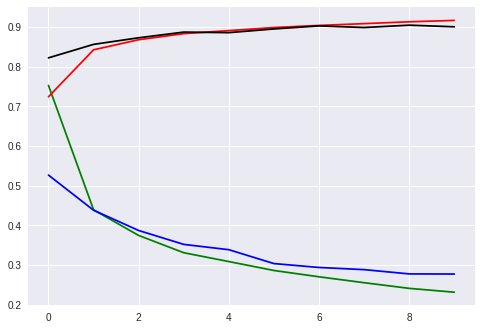

In [19]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()